<a href="https://colab.research.google.com/github/Charan0622/Charan_Scifor/blob/main/Mini%20Project/IMAGE%20CLASSIFICATION%20USING%20CNN/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Install Dependencies and Setup
!pip install opencv-python matplotlib
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

In [ ]:
# 2. Remove dodgy images
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Found 400 files belonging to 4 classes.


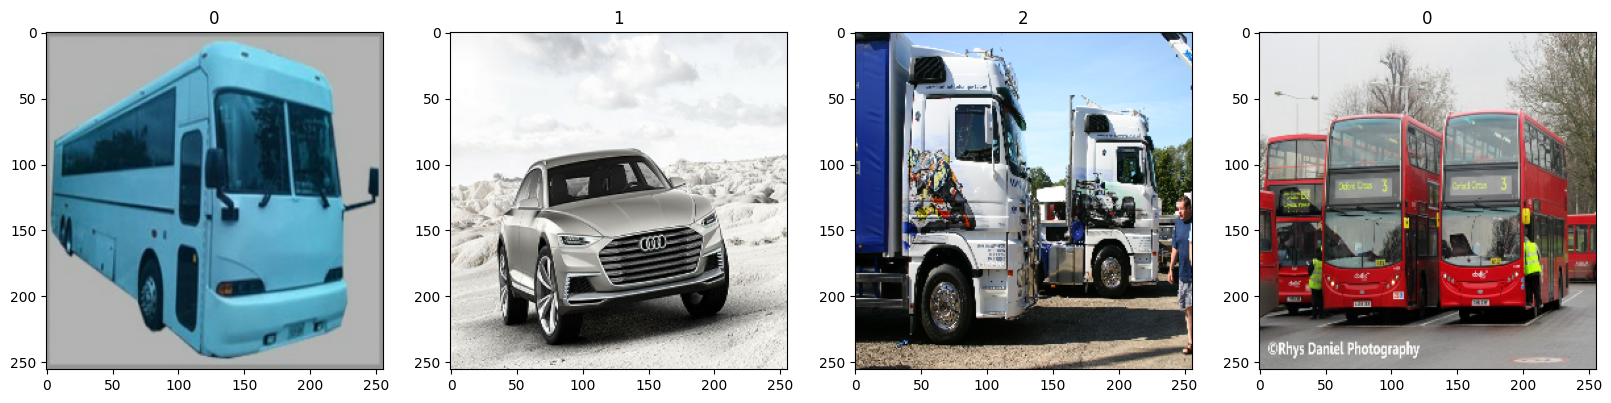

In [ ]:
# 3. Load Data
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    image_size=(256, 256),
    batch_size=32
)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# 4. Scale Data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.91903985, 0.7042114 , 0.4915046 ],
          [0.92890364, 0.64708   , 0.38937816],
          [0.90493834, 0.578573  , 0.312634  ],
          ...,
          [0.26956362, 0.25387734, 0.15583813],
          [0.31225663, 0.29130924, 0.20409606],
          [0.37293229, 0.34155974, 0.25136366]],
 
         [[0.9482408 , 0.6862957 , 0.45650354],
          [0.9301345 , 0.6104347 , 0.35077634],
          [0.88351727, 0.53177196, 0.28123236],
          ...,
          [0.27241635, 0.24888694, 0.1547693 ],
          [0.2641008 , 0.24384958, 0.15757506],
          [0.3758289 , 0.35229948, 0.26602495]],
 
         [[0.932367  , 0.6432993 , 0.39158952],
          [0.8940633 , 0.5554604 , 0.29335865],
          [0.86790186, 0.5128161 , 0.26877502],
          ...,
          [0.28393945, 0.26041   , 0.17413552],
          [0.2865186 , 0.26035437, 0.18520118],
          [0.32825175, 0.3086439 , 0.23021252]],
 
         ...,
 
         [[0.2212069 , 0.07160717, 0.04389577],
          [0.26776

In [ ]:
# 5. Split Data
data_size = len(data)
train_size = int(data_size * 0.7)
val_size = int(data_size * 0.2)
test_size = int(data_size * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
# 6. Build Deep Learning Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
# 7. Train
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 33s 3s/step - loss: 2.0594 - accuracy: 0.2951 - val_loss: 1.3255 - val_accuracy: 0.5312
Epoch 2/20
9/9 [==============================] - 33s 3s/step - loss: 1.3324 - accuracy: 0.3993 - val_loss: 1.1922 - val_accuracy: 0.7656
Epoch 3/20
9/9 [==============================] - 42s 4s/step - loss: 1.1914 - accuracy: 0.4826 - val_loss: 0.9939 - val_accuracy: 0.7656
Epoch 4/20
9/9 [==============================] - 40s 4s/step - loss: 0.9747 - accuracy: 0.6736 - val_loss: 0.6796 - val_accuracy: 0.7969
Epoch 5/20
9/9 [==============================] - 29s 3s/step - loss: 0.6832 - accuracy: 0.7431 - val_loss: 0.4827 - val_accuracy: 0.8594
Epoch 6/20
9/9 [==============================] - 30s 3s/step - loss: 0.4715 - accuracy: 0.8750 - val_loss: 0.4608 - val_accuracy: 0.9062
Epoch 7/20
9/9 [==============================] - 33s 3s/step - loss: 0.3116 - accuracy: 0.9097 - val_loss: 0.2532 - val_accuracy: 0.9219
Epoch 8/20
9/9 [==================

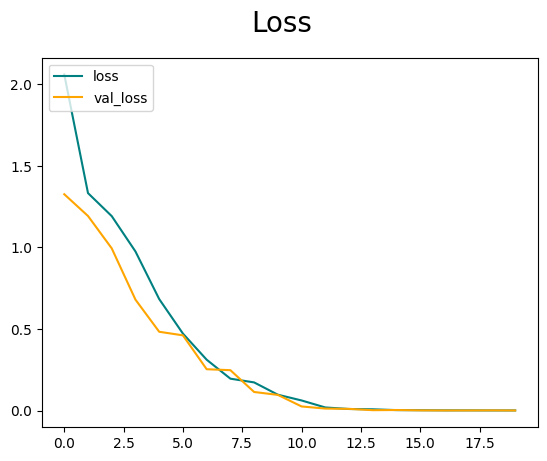

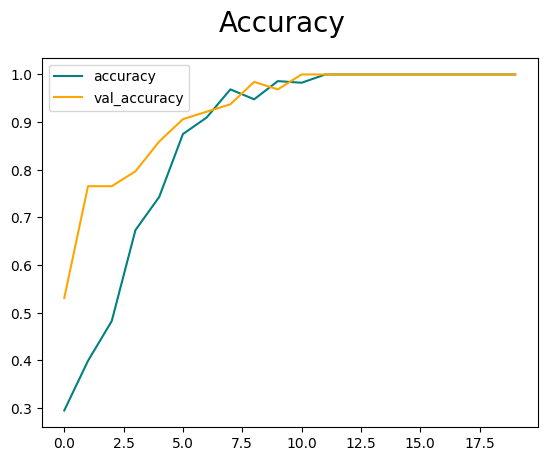

In [ ]:
# 8. Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# 9. Evaluate
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = np.argmax(yhat, axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 [==============================] - 1s 894ms/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


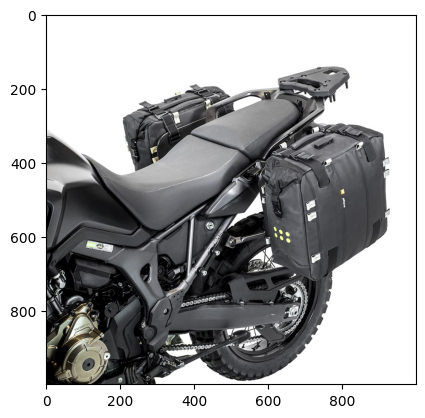

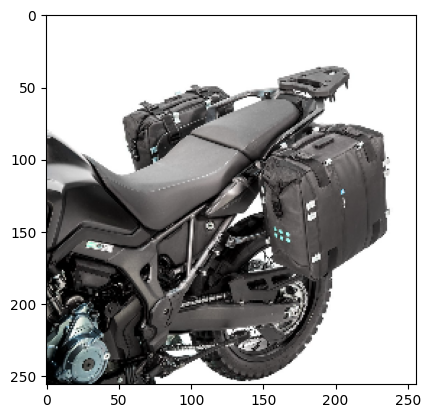

1/1 [==============================] - 0s 45ms/step
[[1.3196172e-06 3.5843064e-07 1.0627341e-05 9.9998772e-01]]
Predicted class is motorcycle


In [ ]:
# 10. Test
class_names = ['bus','car','truck','motorcycle' ]

img = cv2.imread('/content/data/motorcycle/Image_22.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
predicted_class = np.argmax(yhat)
print(yhat)
print(f'Predicted class is {class_names[predicted_class]}')

In [ ]:
# 11. Save the Model
model.save(os.path.join('models','vehicle_classifier.h5'))
new_model = tf.keras.models.load_model('models/vehicle_classifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 92ms/step


array([[1.3196172e-06, 3.5843064e-07, 1.0627341e-05, 9.9998772e-01]],
      dtype=float32)